<h2 style="background:rgba(121, 121, 211, 0.3); padding:10px;">CNN (합성곱 신경망)</h2>

## ▪ 컨볼루션 및 맥스풀링 구현 예제

### 1. 컨볼루션(Convolution)

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

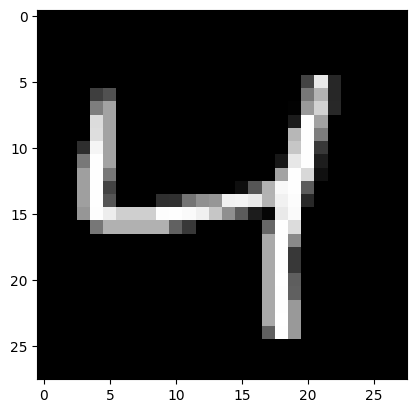

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()
plt.imshow(x_train[2], cmap='gray')

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
t_train.shape

(60000,)

In [18]:
t_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [4]:
import numpy as np

horizontal_filter = np.array([[1., 1., 1.], [0., 0., 0.], [-1., -1., -1.]])
vertical_filter = np.array([[1., 0., -1.], [1., 0., -1.], [1., 0., -1.]])

test_image = x_train[2]
original_image_size = test_image.shape[0]
print("original_image_size =", original_image_size)

conv_output_size = int((original_image_size - 3) / 1 + 1)   # 특성 맵(feature map) 크기 계산 방법
print("output size =", conv_output_size)

original_image_size = 28
output size = 26


In [22]:
filter_size = 3
# 3*3 행렬

def get_conv_image(filter):
    filtered_image = np.zeros((conv_output_size, conv_output_size))
    # 26*26 행렬
    
    for i in range(conv_output_size):
        for j in range(conv_output_size):
            # 합성곱 연산: [0:3, 0:3]의 형식으로 슬라이싱한 값을 filter와 곱하여 합을 구하는 작업
            indice_image = test_image[i:(i + filter_size), j:(j + filter_size)] * filter
            indice_sum = np.sum(indice_image)
            
            if(indice_sum > 255):   # 계산값을 구하다보면, 255를 넘는 경우가 발생. 
                indice_sum = 255
                
            filtered_image[i, j] = indice_sum
            
    return filtered_image

In [23]:
vertical_filtered_image = get_conv_image(vertical_filter)
horizontal_filtered_image = get_conv_image(horizontal_filter)

In [24]:
vertical_filtered_image

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         -67., -232.,   28.,  232.,   39.,    0.,    0.,    0.],
       [   0.,    0.,  -62.,  -81.,   62.,   81.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        -187., -412.,  109.,  

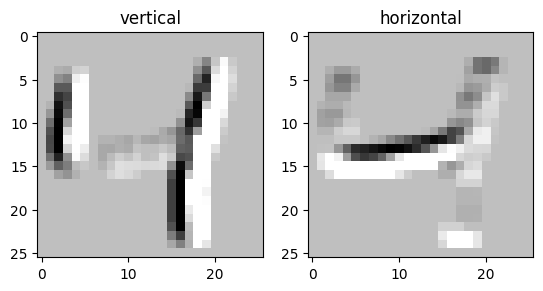

In [25]:
plt.subplot(1, 2, 1)
plt.title("vertical")
plt.imshow(vertical_filtered_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("horizontal")
plt.imshow(horizontal_filtered_image, cmap='gray')
plt.show()

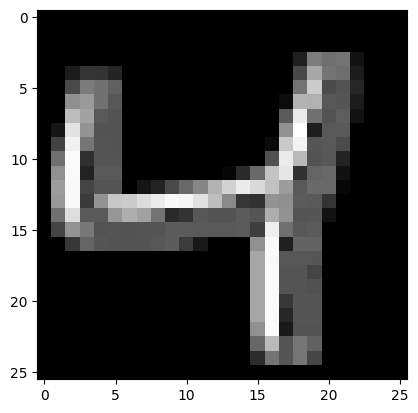

In [26]:
sobel_image = np.sqrt(np.square(horizontal_filtered_image) + np.square(vertical_filtered_image))
plt.imshow(sobel_image, cmap='gray')

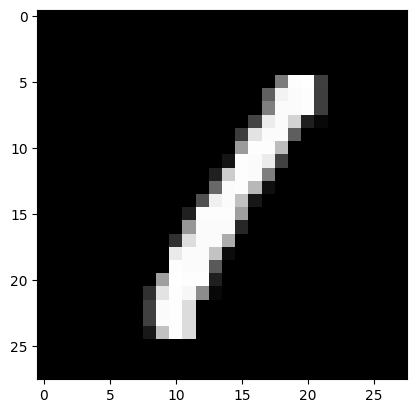

In [27]:
plt.imshow(x_train[3], cmap="gray")

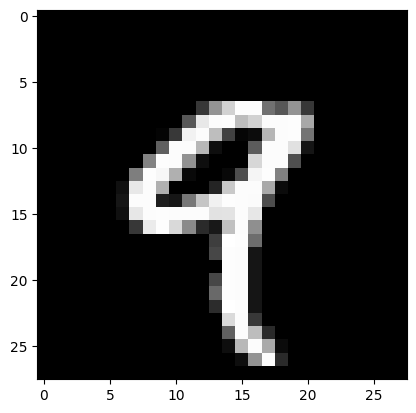

In [28]:
plt.imshow(x_train[4], cmap="gray")

### 2. 맥스풀링 (MaxPooling)

In [29]:
import numpy as np

image = x_train[2]
image_x = image.shape[0]
image_y = image.shape[1]

In [30]:
new_image_x = int(image_x / 2)
new_image_y = int(image_y / 2)

In [31]:
pooled_image = np.zeros((new_image_x, new_image_y))
pooled_image

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

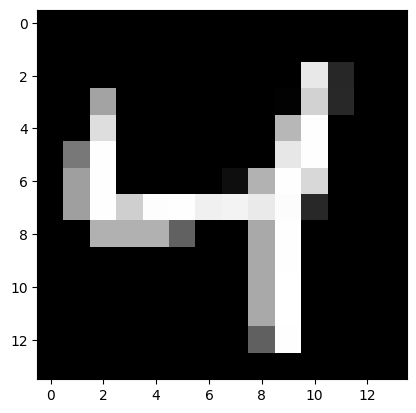

In [32]:
for x in range(0, image_x, 2):
    for y in range(0, image_y, 2):
        pooled_image[int(x/2), int(y/2)] = np.max(image[x:x + 2, y:y + 2])
        
plt.imshow(pooled_image, cmap='gray')

---
## ▪ CNN 예제 1

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

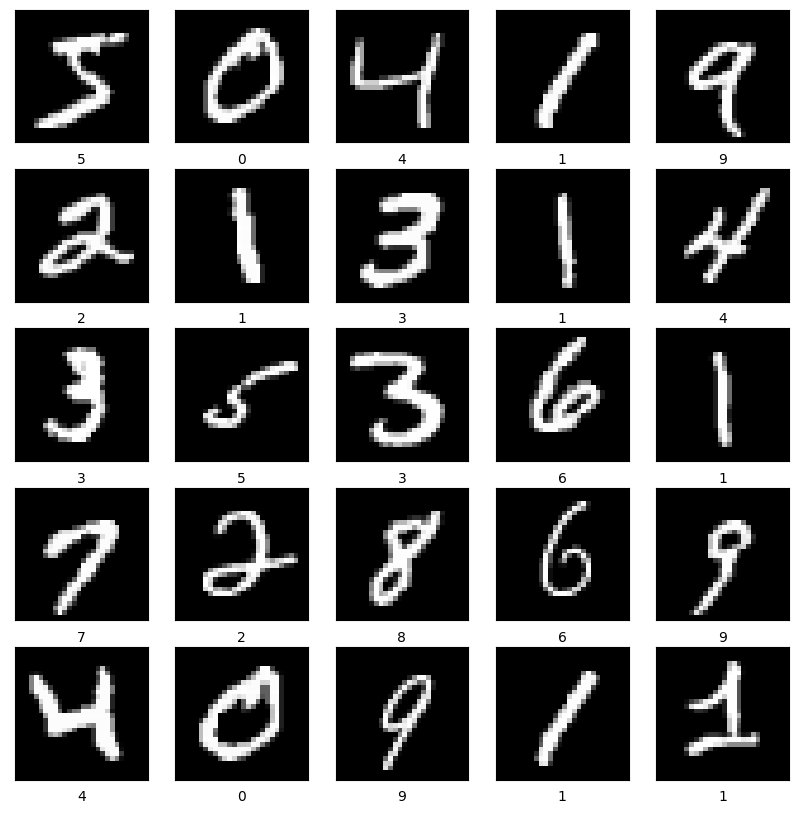

In [58]:
plt.figure(figsize=(10, 10))

for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(y_train[index]))
    
plt.show()

### Sequential 사용
=> 기본적으로 사용하는 방법

---
<h3><span style="color:#ff6600;">Conv2D</span> <span style="color:#666; font-weight:500;">(16, 3 or (3,3), padding='valid', input_shape=(28,28,1), activation='relu')</span></h3>

<br>

- 첫번째 인자: 컨볼루션 필터 수
- 두번째 인자: 컨볼루션 커널의 (행,열) 크기 (한 개만 기술 시 같은 사이즈의 행렬이 생성)
- padding: 경게 처리의 방법 정의
    - valid: 유효한 영역만 출력. 출력 이미지 사이즈는 입력 사이즈보다 작아진다. (패딩을 하지 않겠다는 의미)
    - same: 출력 이미지 사이즈가 입력 이미지 사이즈와 동일하다. (패딩을 하겠다는 의미)
- input_shape: 샘플 수를 제외한 입력 형태의 정의. 모델에서 첫 레이어일 때만 정의한다.
    - (행, 열, 채널 수)로 정의한다. 흑백 영상인 경우 채널 1, 컬러(RGB) 영상인 경우 채널 3으로 설정
- activation: 활성화 함수를 설정한다.
    - linear: 입력 뉴런과 가중치로 계산된 결괏값이 그대로 출력으로 나온다. (default=None)
    - relu: rectifier함수. 은닉층에 주로 쓰인다.
    - sigmoid: 시그모이드 함수. 이진 분류 문제에서 출력층에 주로 쓰인다.
    - softmax: 소프트맥스 함수. 다중 클래스 분류 문제에서 출력층에 주로 쓰인다.
    
---

In [59]:
model = tf.keras.models.Sequential([
    # 1. Feature extraction
    tf.keras.layers.Reshape((28, 28, 1)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    
    # 2. Classification
    tf.keras.layers.Flatten(),   # 입력층 (Conv2D로 형성된 결과가 들어가며 1차원구조로 변경이된다.)
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [63]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0089 - accuracy: 0.9970
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0059 - accuracy: 0.9978
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0056 - accuracy: 0.9983
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step 

In [64]:
model.evaluate(x_test, y_test, verbose=2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 1s - loss: 0.0767 - accuracy: 0.9837 - 897ms/epoch - 3ms/step


[0.07666593044996262, 0.9836999773979187]

### Functional API 사용
함수를 호출하듯이 사용하는 방법

In [69]:
inputs = keras.Input(shape=(28,28))
x = layers.Reshape((28,28,1))(inputs)
x = layers.Conv2D(16, 3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)
outputs = x

In [70]:
model = keras.Model(inputs, outputs)
model.summary()

# 160 = ((3*3)+1) * 16 : 하나의 커널에 입력 9, 출력1이므로 10*16이어서 총 Param이 160개가 나온다.
# 10816 = (26*26) * 16 : 1차원구조로 바꿔주기위한 작업
# 1384576: (10816*128) + 128 : 입력파라미터 10816, 출력파라미터 128
# 1290 = (128*10) + 10 : 입력 128, 출력 10

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape_5 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 flatten_7 (Flatten)         (None, 10816)             0         
                                                                 
 dense_14 (Dense)            (None, 128)               1384576   
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,386,026
Trainable params: 1,386,026
Non-tra

In [77]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1017 - accuracy: 0.9695
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0414 - accuracy: 0.9871
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0208 - accuracy: 0.9935
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step 

In [78]:
model.evaluate(x_test, y_test, verbose=2)

# verbose는 출력을 어떻게 할지 정하는 파라미터로 0, 1, 2로 구성되어있다.

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 1s - loss: 0.0574 - accuracy: 0.9843 - 825ms/epoch - 3ms/step


[0.05742648243904114, 0.9843000173568726]

### Pooling 사용

In [42]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

x_train = np.reshape(x_train, (60000, 28, 28, 1))
x_test = np.reshape(x_test, (10000, 28, 28, 1))

model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# None: 데이터가 몇개인지 알 수 없을때

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 2704)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               346240    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
________________________________________________

In [43]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1776 - accuracy: 0.9479
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0585 - accuracy: 0.9826
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0374 - accuracy: 0.9883
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - lo

In [45]:
model.evaluate(x_test, y_test, verbose=2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 1s - loss: 0.0499 - accuracy: 0.9847 - 606ms/epoch - 2ms/step


[0.04993512108922005, 0.9847000241279602]

### 조금 더 깊은 layer

In [88]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 400)               0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [89]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [90]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1850 - accuracy: 0.9444
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0561 - accuracy: 0.9827
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0393 - accuracy: 0.9879
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - lo

In [91]:
model.evaluate(x_test, y_test, verbose=2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 1s - loss: 0.0297 - accuracy: 0.9914 - 928ms/epoch - 3ms/step


[0.029722237959504128, 0.9914000034332275]

### Padding 유무

In [92]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 16)        2320      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)              

In [93]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1632 - accuracy: 0.9512
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0531 - accuracy: 0.9836
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0383 - accuracy: 0.9884
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - lo

In [94]:
model.evaluate(x_test, y_test, verbose=2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 1s - loss: 0.0348 - accuracy: 0.9888 - 1s/epoch - 4ms/step


[0.034845832735300064, 0.9887999892234802]

---
## ▪ CNN 예제 2

### 이미지 분류 - cifar10

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

##### - 데이터 로드

In [67]:
cifar10 = datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print("Train samples:", train_images.shape, train_labels.shape)
print("Test samples:", test_images.shape, test_labels.shape)

170498071/170498071 [==============================] - 55s 0us/step
Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [68]:
# 원본 이미지 형식이 이미 이렇게 되어있어서 굳이 필요하지는 않은 작업

train_images = train_images.reshape((50000, 32, 32, 3))
trest_images = test_images.reshape((10000, 32, 32, 3))

print("Train samples(reshape):", train_images.shape, train_labels.shape)
print("Test samples(reshape):", test_images.shape, test_labels.shape)

Train samples(reshape): (50000, 32, 32, 3) (50000, 1)
Test samples(reshape): (10000, 32, 32, 3) (10000, 1)


In [96]:
train_labels[:50]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2],
       [6],
       [3],
       [5],
       [4],
       [0],
       [0],
       [9],
       [1],
       [3],
       [4],
       [0],
       [3],
       [7],
       [3],
       [3],
       [5],
       [2],
       [2],
       [7],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0]], dtype=uint8)

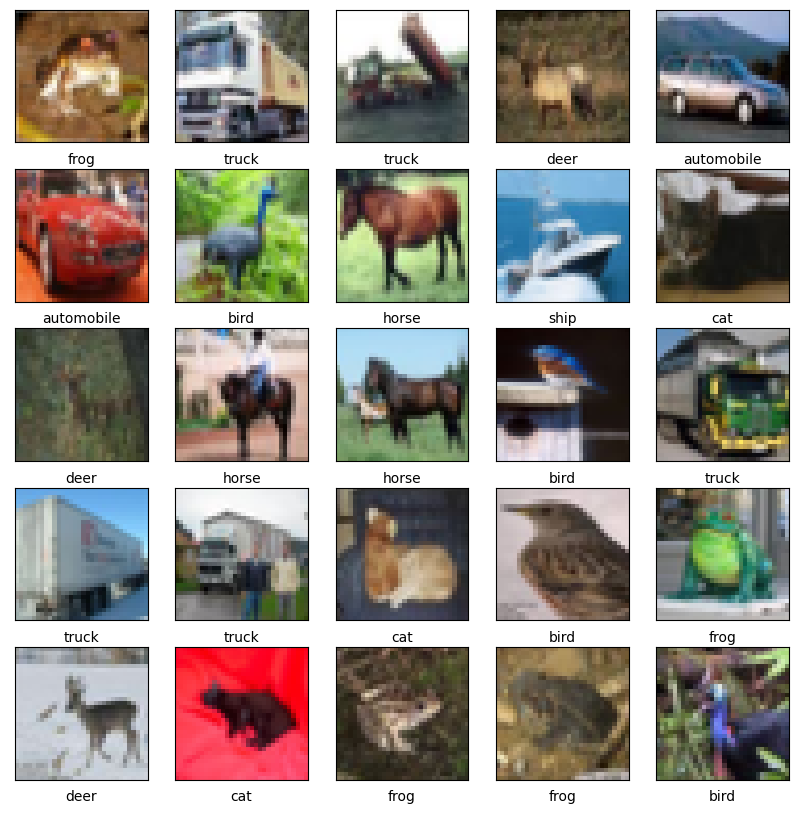

In [79]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
    
plt.show()

##### - 전처리 작업

In [80]:
train_images = train_images/255.0
test_images = test_images/255.0

##### - 모델 정의

In [81]:
model = models.Sequential()

# 특징 추출
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 분류
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_8 (Flatten)         (None, 1024)             

In [82]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test loss =", test_loss)
print("Test accuracy =", test_acc)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5307 - accuracy: 0.4403
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1797 - accuracy: 0.5808
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0303 - accuracy: 0.6356
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/s

In [84]:
predictions = model.predict(test_images)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 2s 6ms/step


In [98]:
predictions.shape

(10000, 10)

In [85]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label[0]]), color=color)

In [86]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color("red")
    thisplot[true_label[0]].set_color("blue")

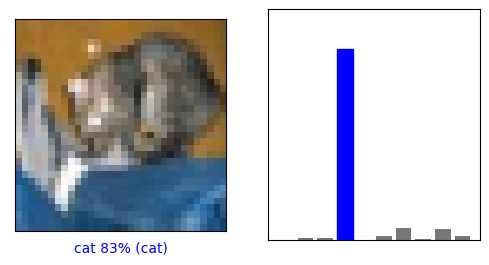

In [87]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()